# **Fake News Predictor** 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1: Import required libraries, packages and corpora

In [ ]:
import pandas as pd
import numpy as np
import re 
import nltk
import sklearn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn

In [ ]:
#Download the corpus of stopwords from NLTK (Natural Language Toolkit)
nltk.download("stopwords") 
#Instantiate ProterStemmer()
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Step 2. Read the dataset

In [ ]:
dataset = pd.read_csv("/content/covid-news-dataset.csv")

In [ ]:
dataset.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


### Step 3. Data Pre-Processing

In [ ]:
dataset.shape

(6420, 3)

#### i. Check for Missing Values (NaN)

In [ ]:
dataset = dataset.dropna(how='any',axis=0) 

In [ ]:
dataset.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

#### ii. Pre-Processing Function

Using Regular Expressions, remove all non-textual data including symbols, special characters, emojis and numbers.
Normalize the case by converting all to lower case.
Split the sentences into words, reduce the words to their stems and remove any stop words.
Rejoin the split words with a whitespace to form a simple, cleaned sentence.


In [ ]:
def preprocess_column(col_name, col_length):
  preprocessed_data = []
  for i in range(0,col_length):
        col_value = dataset[col_name][i]
        col_value = re.sub('[^a-zA-Z]', ' ', col_value)
        col_value = col_value.lower()
        col_value = col_value.split()
        col_value = [ps.stem(word) for word in col_value if not word in set(stopwords.words('english'))]
        col_value = ' '.join(col_value)
        preprocessed_data.append(col_value)
  return preprocessed_data

In [ ]:
#Calling the function for column "tweet"
preprocessed_train = preprocess_column("tweet",6420)

#### iii. Handling Categorical Values- Label Encoding
Replace the categories in the dependent (y) column with numeric values for easier processing in the machine-readable form.
Here, we have "Real" and "Fake" which will be assigned values "1" and "0" respectively (according to alphabetical order)

In [ ]:
le=LabelEncoder()
dataset['label']=le.fit_transform(dataset['label'])

### **Count Vectorizer**

### Step 4. Feature Extraction using Count Vectorizer

Convert a collection of text documents to a sparse matrix representation of token counts. Or, quite simply, it is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [ ]:
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(preprocessed_train).toarray() #preprocessed tweets in the form of a sparse matrix

In [ ]:
#Define the dependent variable (prediction column)
y = dataset.iloc[:,2:3].values

### Step 5. Split the dataset into Train and Test sets

Here, we are using a 20-80 ratio, assigning an alias of "0" to this particular random state.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5136, 2000)
(5136, 1)
(1284, 2000)
(1284, 1)


### **Logistic Regression**

It is a classification algorithm in machine learning that uses one or more independent variables to determine an outcome. The outcome is measured with a dichotomous variable which means it will have only two possible outcomes. For example, it may be used to determine if an email is spam or not, using the rate of misspelled words, a common sign of spam.

Here, we are using it to detect whether the news headline is **fake** or **real**. 

In [ ]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_ypred=lr.predict(x_test)
lr_acc = sklearn.metrics.accuracy_score(lr_ypred,y_test)
print("Logistic Regression Accuracy: ")
print(lr_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 
92.7570093457944 %


In [ ]:
# pr= lr.predict(cv.transform([text_cleaner(headline2)]))
# if pr>0.5:
#   print("Real")
# else:
#   print("Fake!")

### **Naive Bayes Classifier**

Naive Bayes algorithm is based on Bayes’ theorem with the assumption of independence between every pair of features. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Even if the features depend on each other, all of these properties contribute to the probability independently.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_ypred=nb.predict(x_test)
nb_acc = sklearn.metrics.accuracy_score(nb_ypred,y_test)
print("Naive Bayes Accuracy: ")
print(nb_acc*100,"%")

Naive Bayes Accuracy: 
87.14953271028037 %


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **Stochastic Gradient Descent**

Stochastic Gradient Descent is particularly useful when the sample data is in a large number. It supports different loss functions and penalties for classification. It refers to calculating the derivative from each training data instance and calculating the update immediately and it also iteratively makes small adjustments to a machine learning network configuration to decrease the error of the network.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True, random_state=15)
sgd.fit(x_train,y_train)
sgd_ypred=sgd.predict(x_test)
sgd_acc = sklearn.metrics.accuracy_score(sgd_ypred,y_test)
print("Stochastic Gradient Descent Accuracy: ")
print(sgd_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stochastic Gradient Descent Accuracy: 
91.04361370716511 %


### **K-Nearest Neighbour**

Nearest-Neighbour based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the 'k' nearest neighbours of each point.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_ypred=knn.predict(x_test)
knn_acc = sklearn.metrics.accuracy_score(knn_ypred,y_test)
print("K-Nearest Neighbour Accuracy: ")
print(knn_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


K-Nearest Neighbour Accuracy: 
77.10280373831776 %


### **Decision Tree**

Decision Tree builds models in the form of a tree structure. It classifies data into finer and finer categories: from tree trunk to branches to leaves. It uses the if-then rule of mathematics to create sub-categories that fit into broader categories and allows for precise, organic categorization.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Note: tweak values for max acc
dtree=DecisionTreeClassifier(max_depth=40,random_state=18,max_features=None, min_samples_leaf=8)
dtree.fit(x_train,y_train)
dtree_ypred=dtree.predict(x_test)
dtree_acc = sklearn.metrics.accuracy_score(dtree_ypred,y_test)
print("Decision Tree Accuracy: ")
print(dtree_acc*100,"%")

Decision Tree Accuracy: 
87.53894080996885 %


### **Random Forest** 

Random decision trees or random forest are an ensemble learning method for classification, regression, etc.  meaning that a random forest model is made up of a large number of small decision trees, called estimators, which each produce their own predictions. The random forest model combines the predictions of the estimators to produce a more accurate prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=75,oob_score=True,n_jobs=-1, random_state=20,max_features=None,min_samples_leaf=2)
rfm.fit(x_train,y_train)
rfm_ypred=rfm.predict(x_test)
rfm_acc = sklearn.metrics.accuracy_score(rfm_ypred,y_test)
print("Random Forest Accuracy: ")
print(rfm_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Accuracy: 
90.57632398753894 %


### **Support Vector Machine**

Support vector machine is a classifier that represents the training data as points in space separated into categories by a gap as wide as possible. New points are then added to space by predicting which category they fall into and which space they will belong to.



In [ ]:
from sklearn.svm import SVC 
svm=SVC(kernel="linear",C=0.025,random_state=None)
svm.fit(x_train,y_train)
svm_ypred=svm.predict(x_test)
svm_acc = sklearn.metrics.accuracy_score(svm_ypred,y_test)
print("Support Vector Machine Accuracy: ")
print(svm_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine Accuracy: 
92.13395638629284 %


### **Classification ANN**

Classification ANNs seek to classify an observation as belonging to some discrete class as a function of the inputs. The input features (independent variables) can be categorical or numeric types, however, we require a categorical feature as the dependent variable.

### Compile and fit the model

In [ ]:
#Using a Sequential Model
model = Sequential()
model.add(Dense(units = 2000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
model.add(Dense(units = 1, kernel_initializer = "random_uniform", activation = "sigmoid"))

In [ ]:
model.compile(optimizer = "rmsprop", loss="binary_crossentropy", metrics= ["accuracy"])
seq_history= model.fit(x_train,y_train, epochs = 5,verbose=1, steps_per_epoch=50)

Epoch 1/5
50/50 [==============================] - 80s 2s/step - loss: 125.2316 - accuracy: 0.7685
Epoch 2/5
50/50 [==============================] - 77s 2s/step - loss: 0.1372 - accuracy: 0.9537
Epoch 3/5
50/50 [==============================] - 77s 2s/step - loss: 0.2308 - accuracy: 0.9367
Epoch 4/5
50/50 [==============================] - 77s 2s/step - loss: 0.0785 - accuracy: 0.9762
Epoch 5/5
50/50 [==============================] - 77s 2s/step - loss: 0.0541 - accuracy: 0.9819


In [ ]:
acc= model.evaluate(x_train, y_train)


161/161 [==============================] - 26s 163ms/step - loss: 0.0489 - accuracy: 0.9979


In [ ]:
print("Sequential Model Accuracy: ")
acc=acc[1]
print(acc*100,"%")

Sequential Model Accuracy: 
99.78582262992859 %


### **Sample Headlines for Testing**

In [ ]:
headline1 = "Social gatherings of more than six people will be banned across England Wales and Scotland from tomorrow. But what are the new rules what happens if you break them and how do they differ across the nations? ðŸ‘‡"
headline2 = "Korona virus, very new deadly form of virus, china is suffering, may come to India immediately, avoid any form of cold drinks, ice creams, koolfee, etc, any type of preserved foods, milkshake, rough ice, ice colas, milk sweets older then 48 hours, for atleast 90 days from today."
headline3 = "As tuberculosis shaped modernism, so COVID-19 and our collective experience of staying inside for months on end will influence architectureâ€™s near future, @chaykak writes. https://t.co/ag34yZckbU"
headline4 = "SUBHAN ALLAH: AFTER CORONA VIRUS CHINA GOVT LIFTED BAN ON HOLY QURAN & ALLOWED CHINESE MUSLIMS TO READ THEIR SACRED BOOK! SO WHICH OF THE FAVORS OF YOUR LORD WOULD YOU DENY?"
headline5 = "#IndiaFightsCorona Following the national trend 17 States/UTs have more new recoveries than new cases. https://t.co/aHWwlaimmb"

In [ ]:
predictor(text_cleaner(headline2))

Fake!


### Functions for Input Processing

In [ ]:
#function to clean the input text
def text_cleaner(text):
  text = re.sub('[^a-zA-Z]', ' ', text) 
  text = text.lower()
  text = text.split() 
  text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
  text = ' '.join(text)
  return text

In [ ]:
#function to predict
def predictor(text):
  if (model.predict(cv.transform([text])))>0.5:
    print("Real")
  else:
    print("Fake!")

### Comparing Performance Accuracies

In [ ]:
accuracies= {"seq": acc, 
             "logreg": lr_acc, 
             "naive": nb_acc, 
             "SGD": sgd_acc, 
             "kNN": knn_acc, 
             "DT": dtree_acc, 
             "RF": rfm_acc, 
             "SVM": svm_acc
             }

print("Classification models in descending order of accuracy:")
sorted(accuracies.items(), key=lambda x: x[1],reverse=True)


Classification models in descending order of accuracy:


[('seq', 0.9978582262992859),
 ('logreg', 0.927570093457944),
 ('SVM', 0.9213395638629284),
 ('SGD', 0.910436137071651),
 ('RF', 0.9057632398753894),
 ('DT', 0.8753894080996885),
 ('naive', 0.8714953271028038),
 ('kNN', 0.7710280373831776)]

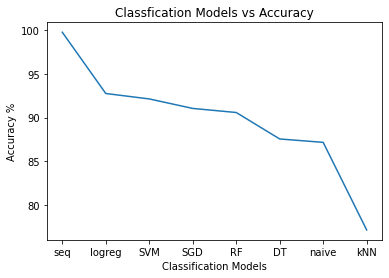

In [ ]:
lists = sorted(accuracies.items(), key=lambda x: x[1]*100,reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

z = []
for i in y:
   z.append(i*100)
tuple(z)
plt.plot(x, z)

plt.title('Classfication Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy %')
plt.show()


### Save the model as a .h5 file

Since this model has the highest accuracy, we will be using this for the prediction during the deployment of our application.

In [ ]:
model.save("fake-news.h5")

### **k-Fold Cross Validation**

In [ ]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def build_classifier():
  model = Sequential()
  model.add(Dense(units = 2000, kernel_initializer = "random_uniform", activation = "relu"))
  model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
  model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
  model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
  model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
  model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
  model.add(Dense(units = 4000, kernel_initializer = "random_uniform", activation = "relu"))
  model.add(Dense(units = 1, kernel_initializer = "random_uniform", activation = "sigmoid"))
  model.compile(optimizer = "rmsprop", loss="binary_crossentropy", metrics= ["accuracy"])
  return model

### Validation 1

In [ ]:
kf = KFold(n_splits=8, random_state=15, shuffle=True)
val_accuracy_per_fold = []
val_loss_per_fold = []

for train, test in kf.split(x, y):
  sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model=build_classifier()
history = model.fit(x_train,y_train, epochs = 10,verbose=1, steps_per_epoch=50, validation_data=(x_test, y_test))

Epoch 1/10
50/50 [==============================] - 85s 2s/step - loss: 2297.1436 - accuracy: 0.5275 - val_loss: 0.7039 - val_accuracy: 0.5179
Epoch 2/10
50/50 [==============================] - 83s 2s/step - loss: 0.9564 - accuracy: 0.5827 - val_loss: 0.4325 - val_accuracy: 0.8092
Epoch 3/10
50/50 [==============================] - 83s 2s/step - loss: 1.9617 - accuracy: 0.6454 - val_loss: 4.8208 - val_accuracy: 0.5125
Epoch 4/10
50/50 [==============================] - 83s 2s/step - loss: 0.5861 - accuracy: 0.8004 - val_loss: 0.6338 - val_accuracy: 0.6822
Epoch 5/10
50/50 [==============================] - 82s 2s/step - loss: 0.3674 - accuracy: 0.9099 - val_loss: 0.6732 - val_accuracy: 0.9073
Epoch 6/10
50/50 [==============================] - 82s 2s/step - loss: 0.5707 - accuracy: 0.9130 - val_loss: 0.6743 - val_accuracy: 0.9089
Epoch 7/10
50/50 [==============================] - 82s 2s/step - loss: 0.0971 - accuracy: 0.9755 - val_loss: 0.5535 - val_accuracy: 0.9089
Epoch 8/10
50/50 

In [ ]:
val_accuracy_per_fold.append(history.history['val_accuracy'][-1])
val_loss_per_fold.append(history.history['val_loss'][-1])

### Validation 2

Continued in Validation_File.ipynb

## **Visualization of Observations**


#### 1. Model Accuracy- Training vs Validation

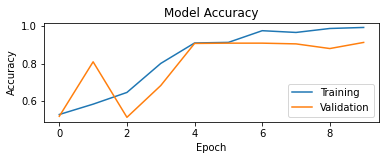

In [ ]:
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

#### 2. Model Loss- Training vs Validation

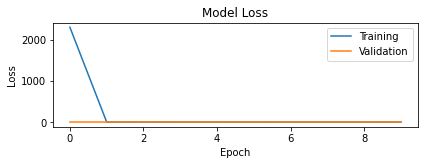

In [ ]:
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

## Resources for Prediction Verification

In [ ]:
!pip install beautifulsoup4
!pip install google
from googlesearch import search

In [ ]:
print("Here are some resources that could verify our prediction: ")
query = headline1 #enter headline here
for j in search(query, tld="com", stop=5, pause=1):
  print(j)

Here are some resources that could verify our prediction: 
https://www.bbc.com/news/uk-54081131
https://www.bbc.com/news/uk-54142699
https://abcnews.go.com/Health/wireStory/uk-imposes-coronavirus-restrictions-england-72907229
https://www.webmd.com/lung/news/20200909/uk-to-limit-social-gatherings-to-six-people
https://www.unhcr.org/56bb369c9.pdf
